<a href="https://colab.research.google.com/github/NFroehl/DMML2021_Nestle/blob/main/code/Project_code_15-12-21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project : Nestle

Here are the important libraries that we will use

In [115]:
# Install and update spaCy
!pip install -U spacy

# Download the french language model
!python -m spacy download fr

⚠ As of spaCy v3.0, shortcuts like 'fr' are deprecated. Please use the
full pipeline package name 'fr_core_news_sm' instead.
     |████████████████████████████████| 17.4 MB 318 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [116]:
# Libraries:

import pandas as pd
import numpy as np
import spacy
import string
from spacy.lang.fr.stop_words import STOP_WORDS
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

#1) Data Preparation

##a) Import Data

First, we read the Training Data using the download link.

In [117]:
# Read the data:

# We take the url to doawnload the training data:

url = "https://raw.githubusercontent.com/NFroehl/DMML2021_Nestle/74eb14159f5f045d427350358637df31b81ea73b/data/training_data.csv"
Training_Data = pd.read_csv(url, delimiter=",")
Training_Data.head(2)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1


We get some informations about the Training Data in order to see how good they are.

In [118]:
Training_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4800 non-null   int64 
 1   sentence    4800 non-null   object
 2   difficulty  4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.6+ KB


In [119]:
# Base rate: the data-set is balanced
Training_Data.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

Then, we read the Test Data using also the download link.

In [120]:
url = "https://raw.githubusercontent.com/NFroehl/DMML2021_Nestle/main/data/unlabelled_test_data.csv"
Test_Data = pd.read_csv(url, delimiter=",")
Test_Data.head(2)

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...


##b) Vectorize Data

To do the regression, even without cleaning the data, we need a tokenizer function.

In [121]:
# Let's implement the tokenizer function:

# Load French language model:
sp = spacy.load('fr_core_news_sm')

# Tokenizer function:
def spacy_tokenizer1(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    # Return list of tokens
    return mytokens

#2) Classification without Data Cleaning

For each method, we will do hyperparametrization for the TfidVectorizer() function. We will do it on the analyzers word and char.

In [122]:
# To compare all methods, we will create a list of accuracies depending on parameters and methods:
TotalResult = []

##a) Split Data

In [123]:
# Select features
X = Training_Data['sentence'] # the features we want to analyze
y = Training_Data['difficulty'] # the labels, or answers, we want to test against

In [124]:
# Import train/test split function
from sklearn.model_selection import train_test_split

# Train/test splitting code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

##b) Function to evaluate the following models

In [125]:
# Evaluate the models
def evaluate(true, pred):
    precision = precision_score(true, pred, average='micro')
    recall = recall_score(true, pred, average='micro')
    f1 = f1_score(true, pred, average='micro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

##c) Classification of the reviews using Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define list for result
analyzer = ['word', 'char']
result = []

for x in analyzer:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer1, 
                                   analyzer=x)

    # Define classifier
    classifier = LogisticRegression()

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("Analyzer: ", x)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([x, accuracy_score(y_test, y_pred)])

Analyzer:  word
CONFUSION MATRIX:
[[  0   0   0   0   0 174]
 [  0   0   0   0   0 161]
 [  0   0   0   0   0 159]
 [  0   0   0   0   0 154]
 [  0   0   0   0   0 160]
 [  0   0   0   0   0 152]]
ACCURACY SCORE:
0.1583
CLASSIFICATION REPORT:
	Precision: 0.1583
	Recall: 0.1583
	F1_Score: 0.1583
-----------------------
Analyzer:  char
CONFUSION MATRIX:
[[113  25  17  12   2   5]
 [ 38  57  43   8   4  11]
 [ 17  31  54  21  12  24]
 [ 11   1  11  51  34  46]
 [  1   1  10  35  59  54]
 [  4   2   9  18  26  93]]
ACCURACY SCORE:
0.4448
CLASSIFICATION REPORT:
	Precision: 0.4448
	Recall: 0.4448
	F1_Score: 0.4448
-----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [127]:
TotalResult.append(result)
result

[['word', 0.15833333333333333], ['char', 0.44479166666666664]]

##d) Classification of the reviews using KNN Regression

First, we tun hyperparameters with GridSearch (for n_neighbors, p and weights).

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define parameters to test
grid = {'n_neighbors':np.arange(1,7),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', knn_cv)])
pipe.fit(X_train, y_train)

nb = knn_cv.best_params_['n_neighbors']
p = knn_cv.best_params_['p']
w = knn_cv.best_params_['weights']

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))

Hyperparameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Train Score: 0.3539


And we do the regression with the best parameters.

In [129]:
# Define list for result
analyzer = ['word', 'char']
result = []

for x in analyzer:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer1, 
                                   analyzer=x)

    # Define classifier
    classifier = KNeighborsClassifier(n_neighbors=nb, p = p, weights = w)

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("Analyzer: ", x)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([x, accuracy_score(y_test, y_pred)])

Analyzer:  word
CONFUSION MATRIX:
[[174   0   0   0   0   0]
 [161   0   0   0   0   0]
 [159   0   0   0   0   0]
 [154   0   0   0   0   0]
 [160   0   0   0   0   0]
 [152   0   0   0   0   0]]
ACCURACY SCORE:
0.1812
CLASSIFICATION REPORT:
	Precision: 0.1812
	Recall: 0.1812
	F1_Score: 0.1813
-----------------------
Analyzer:  char
CONFUSION MATRIX:
[[84 38 27  7  6 12]
 [28 50 39 21 11 12]
 [23 25 39 31 21 20]
 [ 4 10 20 31 47 42]
 [ 3  4 14 22 54 63]
 [ 1  4  7 18 46 76]]
ACCURACY SCORE:
0.3479
CLASSIFICATION REPORT:
	Precision: 0.3479
	Recall: 0.3479
	F1_Score: 0.3479
-----------------------


In [130]:
TotalResult.append(result)
result

[['word', 0.18125], ['char', 0.34791666666666665]]

##e) Classification of the reviews using Decision Tree Regression

First, we tun hyperparameters with GridSearch (for depth).

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Grid Search - tuning tree depth

# Define parameter to test
grid = {'max_depth':np.arange(1,10)}

# Define and fit model

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, grid, cv=5)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree_cv)])
pipe.fit(X_train, y_train)

d = tree_cv.best_params_

# Print results
print("Hyperparameters:", tree_cv.best_params_)
print("Train Score:", round(tree_cv.best_score_, 4))

Hyperparameters: {'max_depth': 5}
Train Score: 0.3583


And we do the regression with the best parameter.

In [132]:
# Define list for result
analyzer = ['word', 'char']
result = []

for x in analyzer:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer1, 
                                   analyzer=x)

    # Define classifier
    classifier = DecisionTreeClassifier(max_depth=6, random_state=72) #best parameter we found

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("Analyzer: ", x)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([x, accuracy_score(y_test, y_pred)])

Analyzer:  word
CONFUSION MATRIX:
[[  0   0   0   0   0 174]
 [  0   0   0   0   0 161]
 [  0   0   0   0   0 159]
 [  0   0   0   0   0 154]
 [  0   0   0   0   0 160]
 [  0   0   0   0   0 152]]
ACCURACY SCORE:
0.1583
CLASSIFICATION REPORT:
	Precision: 0.1583
	Recall: 0.1583
	F1_Score: 0.1583
-----------------------
Analyzer:  char
CONFUSION MATRIX:
[[84 43 40  4  0  3]
 [31 44 74  9  0  3]
 [ 8 23 99 13 12  4]
 [ 4  6 45 40 40 19]
 [ 2  3 29 30 63 33]
 [ 1  2 29 13 52 55]]
ACCURACY SCORE:
0.4010
CLASSIFICATION REPORT:
	Precision: 0.4010
	Recall: 0.4010
	F1_Score: 0.4010
-----------------------


In [133]:
TotalResult.append(result)
result

[['word', 0.15833333333333333], ['char', 0.4010416666666667]]

##f) Classification of the reviews using Random Forest Regression

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define list for result
analyzer = ['word', 'char']
result = []

for x in analyzer:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer1, 
                                   analyzer=x)

    # Define classifier
    classifier = RandomForestClassifier(n_estimators=100)

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("Analyzer: ", x)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([x, accuracy_score(y_test, y_pred)])

Analyzer:  word
CONFUSION MATRIX:
[[174   0   0   0   0   0]
 [161   0   0   0   0   0]
 [159   0   0   0   0   0]
 [154   0   0   0   0   0]
 [160   0   0   0   0   0]
 [152   0   0   0   0   0]]
ACCURACY SCORE:
0.1812
CLASSIFICATION REPORT:
	Precision: 0.1812
	Recall: 0.1812
	F1_Score: 0.1813
-----------------------
Analyzer:  char
CONFUSION MATRIX:
[[112  46  11   3   1   1]
 [ 41  75  34   4   3   4]
 [ 17  44  52  19  16  11]
 [  6  10  18  50  39  31]
 [  3   4  12  36  57  48]
 [  4   9  10  21  38  70]]
ACCURACY SCORE:
0.4333
CLASSIFICATION REPORT:
	Precision: 0.4333
	Recall: 0.4333
	F1_Score: 0.4333
-----------------------


In [135]:
TotalResult.append(result)
result

[['word', 0.18125], ['char', 0.43333333333333335]]

##g) Results

Let's compare our previous results to choose which method we are going to keep for the next part (with data cleaning).

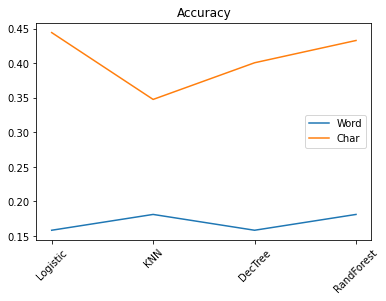

In [136]:
# I import the library that I need to plot :
import matplotlib.pyplot as plt

# I build the lists which contains the accuracy for each method :
n = len(TotalResult)
TestAccuracyWord = [TotalResult[i][0][1] for i in range(n)]
TestAccuracyChar = [TotalResult[i][1][1] for i in range(n)]
x = [i for i in range(1,n+1)]

# I plot the lists and I put a name for each point :
labels = ['Logistic', 'KNN', 'DecTree', 'RandForest']

plt.title('Accuracy')
plt.plot(x, TestAccuracyWord, label = 'Word')
plt.plot(x, TestAccuracyChar, label = 'Char')
plt.legend()
plt.xticks(x, labels, rotation = 45)

plt.show()

In [137]:
TotalResult

[[['word', 0.15833333333333333], ['char', 0.44479166666666664]],
 [['word', 0.18125], ['char', 0.34791666666666665]],
 [['word', 0.15833333333333333], ['char', 0.4010416666666667]],
 [['word', 0.18125], ['char', 0.43333333333333335]]]

According to the list and the graph, we decide to continue to work with Logistic Regression and Analyzer = 'char'. Random Forest has also a very good accuracy. Maybe we will try it too.

#3) Classification with Data Cleaning

##a) Data Cleaning function

In [138]:
# Let's implement the tokenizer function:

# Load French language model:
sp = spacy.load('fr_core_news_sm')

# Tokenizer function:
def spacy_tokenizer2(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove anonymous dates and people
    mytokens = [ word.replace('xx/', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]

    # Return preprocessed list of tokens
    return mytokens

##b) Classification with Clean Data using Logistic Regression

We do the regression.

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer2, 
                                   analyzer='char')
# Define classifier
classifier = LogisticRegression()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char',
                                 tokenizer=<function spacy_tokenizer2 at 0x7f5272901200>)),
                ('classifier', LogisticRegression())])

In [140]:
# Prediction
y_pred = pipe.predict(X_test)

# Evaluate
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[113  25  17  12   2   5]
 [ 38  57  43   8   4  11]
 [ 17  31  54  21  12  24]
 [ 11   1  11  51  34  46]
 [  1   1  10  35  59  54]
 [  4   2   9  18  26  93]]
ACCURACY SCORE:
0.4448
CLASSIFICATION REPORT:
	Precision: 0.4448
	Recall: 0.4448
	F1_Score: 0.4448


#4) Final Classifation for Kaggle

To get a better accuracy, we use the whole Train Data to do the final regression.

In [141]:
# We select the Data for the regression
X_train = Training_Data['sentence'] 
y_train = Training_Data['difficulty'] 

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer2, 
                                   analyzer='char')
# Define classifier
classifier = LogisticRegression()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char',
                                 tokenizer=<function spacy_tokenizer2 at 0x7f5272901200>)),
                ('classifier', LogisticRegression())])

Now we can do the prediction with the Test Data for Kaggle

In [143]:
X_test = Test_Data["sentence"]
LogRegPred = pipe.predict(X_test)

In [144]:
LogisticReg_pred = pd.DataFrame(LogRegPred)

In [145]:
LogisticReg_pred.columns = ['difficulty']
LogisticReg_pred.insert(0, 'id', [i for i in range(1200)])

In [146]:
LogisticReg_pred.to_csv('LogisticReg_prediction.csv', header = True, index = False)